# <font color= 'blue'> Project: High Value Customer Identification (Insiders)</font>


## Business Challange

A loyalty program of customers to increase sales frquency.

## Business Planning (IOT)

### Input 
    1. Business Problem
        - Select the most valuable customers to join a loyalty program.
    
    2. Dataset
        - One year e-commerce sales.
        Invoice No: Invoice number (A 6-digit integral number uniquely assigned to each transaction)

        Stock Code: Product (item) code

        Description: Product (item) name

        Quantity: The quantities of each product (item) per transaction

        Invoice Date: The day when each transaction was generated

        Unit Price: Unit price (Product price per unit)

        Customer ID: Customer number (Unique ID assigned to each customer)

        Country: Country name (The name of the country where each customer resides)
    
### Output
    1. Indicate customers who will be part of a loyalty program called Insiders.
            - List: client_id | is_insider
                        10323 |   yes
                        32413 |   no
    2. A report with the answers for the business questions.
    - Who are the customers eligible to join the program?
    - How many customers will be part os this group?
    - What are the main characteristics of these customers?
    - What is the contribution percentage revenue from Insiders?
    - What is the group's revenue expectation for the coming months?
    - What are the condictions for select customers to join Insiders?
    - What are the condictions for removing Insiders customers?
    - What is the guarantee that the Insiders program is better than the rest of the base?
    - What actions can the marketing team take to increase revenue?
    
### Taks
    1. Who are the customers eligible to join the program?
        - What does it mean, to be elegible? What does high-value customers mean?
             - Revenue: ticket, bascket size, high LTV (Lifetime Value), churn probability,high TVC prevision, purchasing propensity.
             - Cost: lower return rate.
             - Purchase experience: high average evaluation rate.
     
    2. How many customers will be part os this group?
        - Total nambers of customers.
        - % Insiders group.
        
    3. What are the main characteristics of these customers?
        - Age
        - Location
        - Others characteristics.
        - Ticket, bascket size, high LTV, churn probability,high TVC prevision, purchasing propensity.
        
    4. What is the contribution percentage revenue from Insiders?
         - Total revenue for the year.
         - Insiders group revenue.
         
    5. What is the group's revenue expectation for the coming months?
        - LTV Insisders group.
        - Cohort analysis.
        
    6. What are the condictions for select customers to join Insiders?
        - Define the periodicity
        - The person needs to have similar characteristics with someone in the group.
    
    7. What are the condictions for removing Insiders customers?
        - Define the periodicity
        - The person doen't need to have similar characteristics with someone in the group.
        
    8. What is the guarantee that the Insiders program is better than the rest of the base?
        - A/B test
        - A/B bayesian test
        - Hypothesis test
        
    9. What actions can the marketing team take to increase revenue?
        - Discont
        - Purchase preference
        - Purchase shipping
        - Company visit  
        
## Benchmark Solutions

###  Desk Research
 - RFM model (recency, frequency,, monetary): sorted data to have a RFM Score.
 
     Recency: How recently a customer has made a purchase
     
     Frequency: How often a customer makes a purchase
     
     Monetary Value: How much money a customer spends on purchases
     

 - example project: https://guillaume-martin.github.io/rfm-segmentation-with-python.html

# 0.0. Imports

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import umap.umap_ as umap

from matplotlib import pyplot as plt
from IPython.display import Image, HTML
from datetime import datetime
from sklearn import cluster as c
from sklearn import metrics as m
from plotly import express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## 0.1. Helper Functions

In [185]:
 def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings() 
    

Populating the interactive namespace from numpy and matplotlib


/Users/anaotavio/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['datetime', 'mod']
`%matplotlib` prevents importing * from pylab and numpy



## 0.2. Load dataset

In [186]:
# load data
df_raw = pd.read_csv('/Users/anaotavio/Documents/repos/insiders_clustering//data/Ecommerce.csv')

# drop extra column
df_raw = df_raw.drop(columns = ['Unnamed: 8'], axis = 1)

# 1.0. Data Description

In [187]:
df1 = df_raw.copy()

## 1.1. Rename columns

In [188]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']
df1.columns = cols_new

## 1.2. Data dimensions

In [189]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 541909
Number of Columns: 8


## 1.3. Data types

In [190]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [191]:
df1['invoice_no'] = df1['invoice_no'].astype(int)

ValueError: invalid literal for int() with base 10: 'C536379'

In [192]:
df1['stock_code'] = df1['stock_code'].astype(int)

ValueError: invalid literal for int() with base 10: '85123A'

## 1.4. Check NA

In [193]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [194]:
# remove na
df1 = df1.dropna(subset = ['description', 'customer_id'])
print('Removed data:{:.2f}'.format (1-(df1.shape[0]/df_raw.shape[0])))

Removed data:0.25


In [195]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change dtypes

In [196]:
# invoice_date
df1["invoice_date"] = pd.to_datetime(df1["invoice_date"],infer_datetime_format=True)

# customer_id
df1['customer_id'] = df1['customer_id'].astype(int)
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

In [197]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


## 1.7. Descriptive Statistics

# 2.0. Feature Engineering

In [198]:
df2 = df1.copy()

## 2.1. Feature Creation

In [199]:
# data reference
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country'],
                   axis =1 ).drop_duplicates( ignore_index = True)

# Gross Revenue: quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on = 'customer_id', how = 'left')


# Recency (Last Day Purchase)
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max()- df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on = 'customer_id', how = 'left')

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on = 'customer_id', how ='left')

# Avg Ticket
avg_ticket = df2[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df_ref = pd.merge( df_ref, avg_ticket, on = 'customer_id', how = 'left')

In [200]:


df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5288.63,302,35,16.950737
1,13047,3079.10,31,18,15.709694
2,12583,7187.34,2,18,28.634821
3,13748,948.25,95,5,33.866071
4,15100,635.10,330,6,105.850000


# 3.0. Data Filtering

In [201]:
df3 = df_ref.copy()

# 4.0. Exploratory Data Analysis (EDA)

In [202]:
df4 = df3.copy()

# 5.0. Data Preparation

In [203]:
df5 = df4.copy()

# 6.0. Feature Selection

In [204]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine Tunning

In [205]:
X = df6.drop(columns = ['customer_id'])

In [206]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5288.63,302,35,16.950737
1,3079.10,31,18,15.709694
2,7187.34,2,18,28.634821
3,948.25,95,5,33.866071
4,635.10,330,6,105.850000


In [207]:
clusters = [2, 3, 4, 5, 6, 7]

## 7.1. Within-Cluster Sum os Square (WSS)

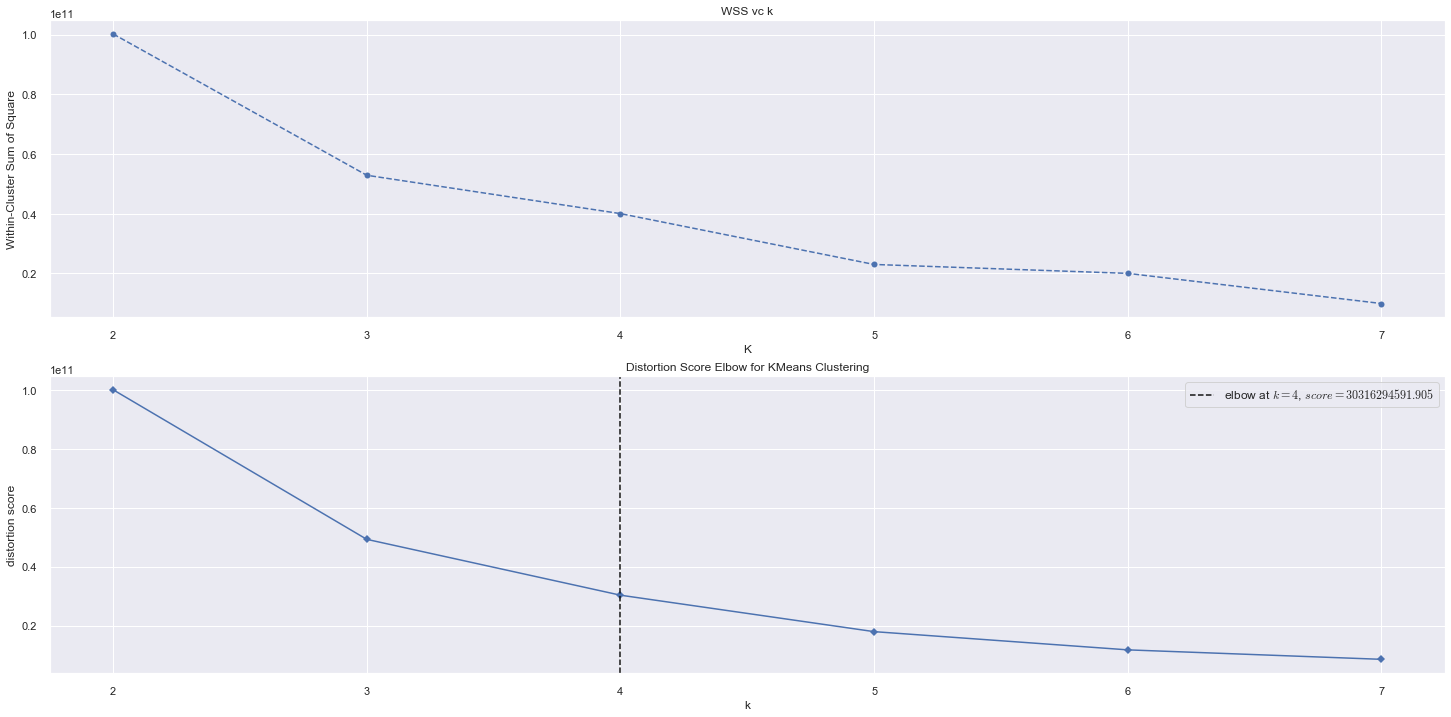

In [208]:
# WSS: Within- CLuster Sum of Squares -> compactness
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    # model training
    kmeans.fit(X)
    
    # validation
    wss.append(kmeans.inertia_)
    

plt.subplot(2, 1, 1 )
# Plot wss - Elbow Method
plt.plot(clusters, wss, linestyle='--', marker = 'o', color='b')
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square');
plt.title('WSS vc k')

plt.subplot(2, 1, 2 )
#from yellowbrick.cluster import KElbowVisualizer
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False)
kmeans.fit( X)
kmeans.show()

plt.show()

## 7.2. Silhouette Score

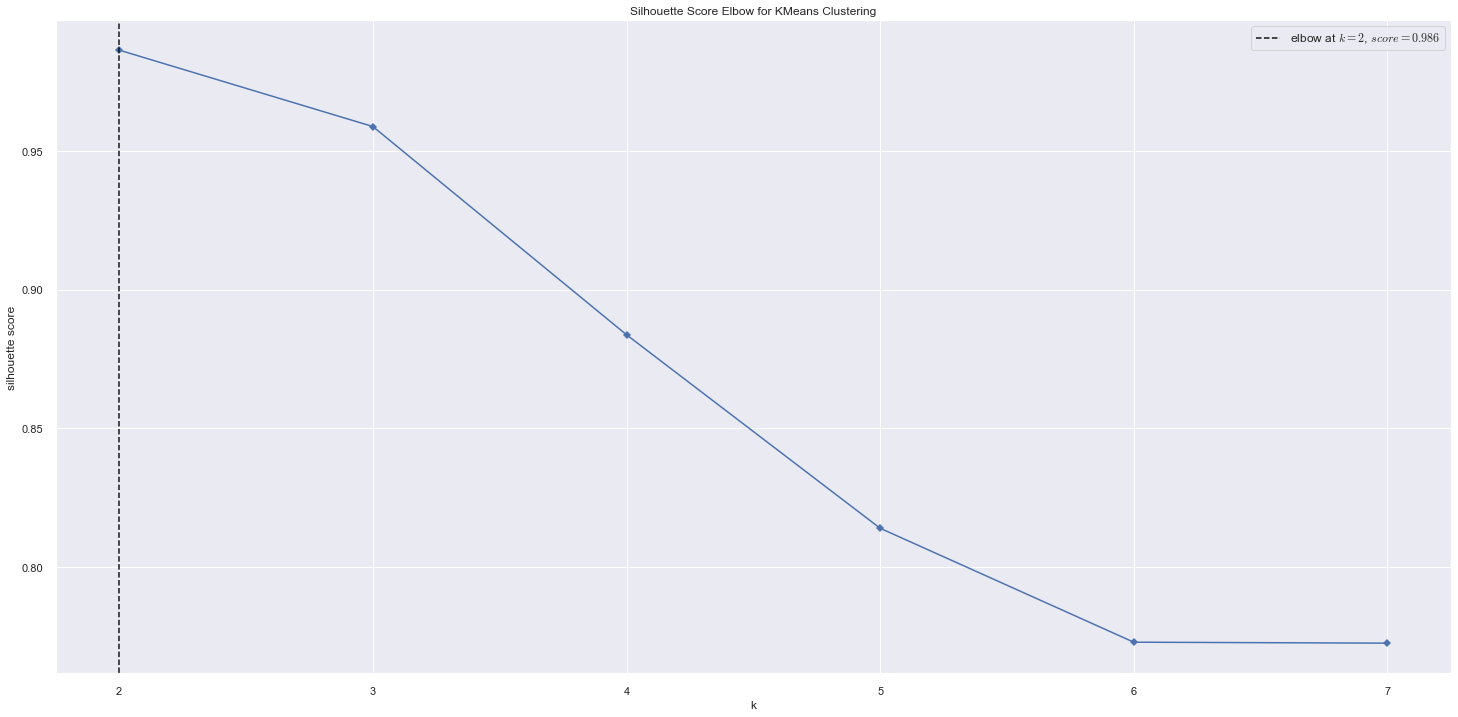

In [209]:
# Silhoutte Score: is calculated using the mean intra-cluster distance ( a ) and the mean nearest-cluster distance ( b ) for each sample
# Is about separation
# Silhouette is better than Wss because takes into consideration the nearest-cluster distance.

kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit( X)
kmeans.show()


## 7.1. Silhouette Analysis

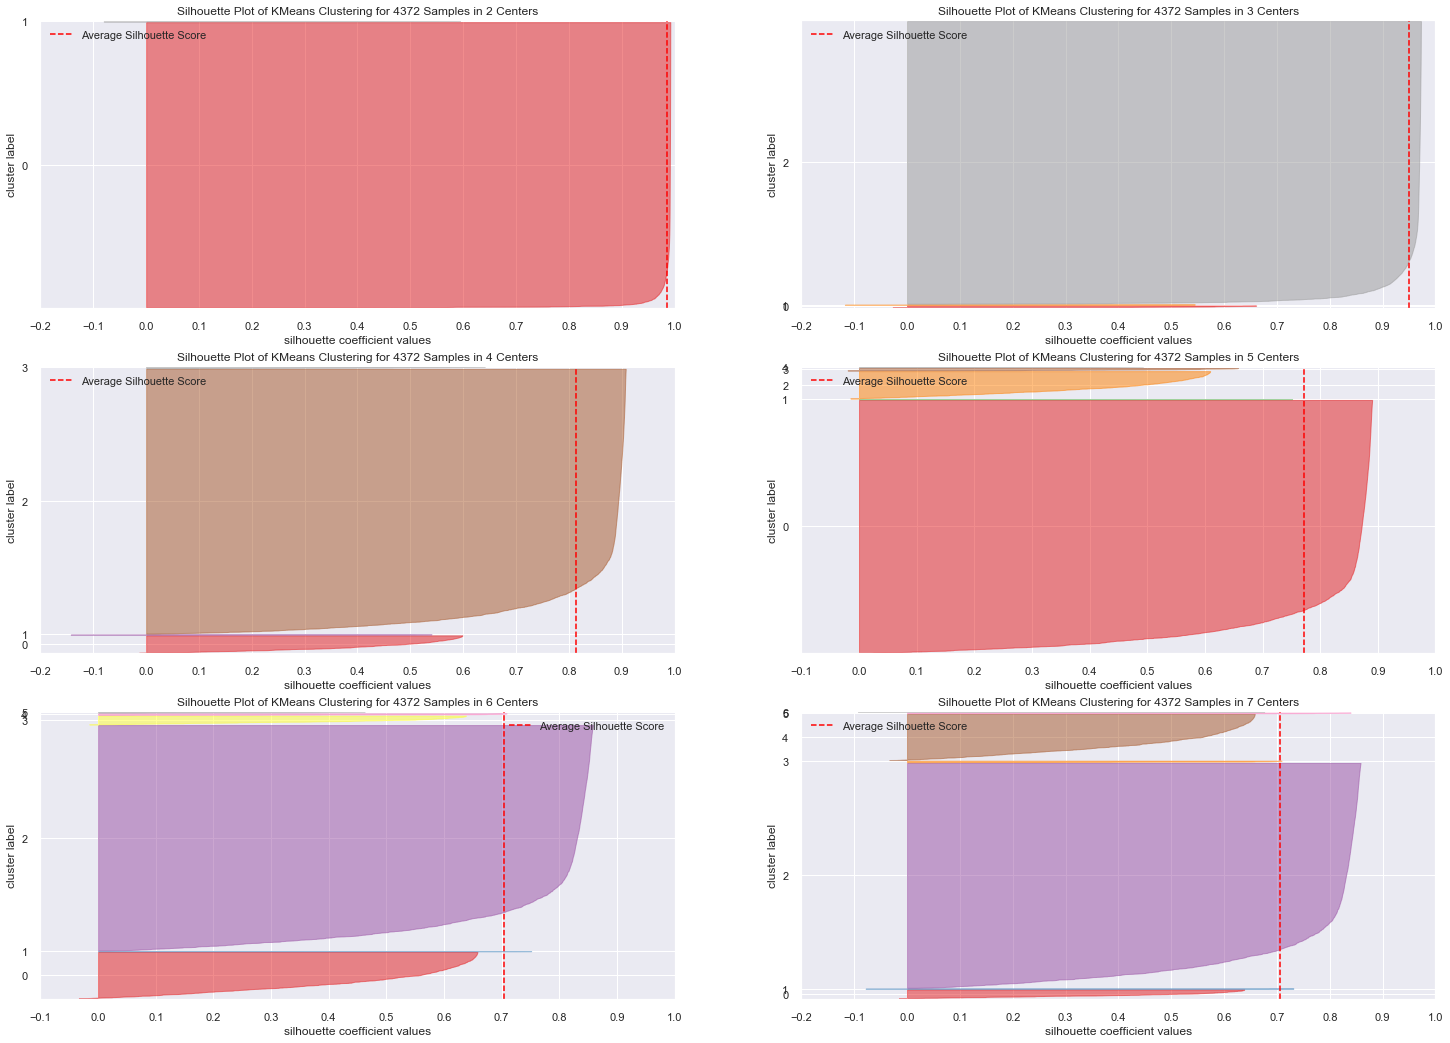

In [210]:
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
k=2
fig, ax = plt.subplots(3,2, figsize=(25,18))
for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k,2)
    visualizer = SilhouetteVisualizer(km, colosr='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

# 8.0. Model Training

## 8.1. K-Means

In [211]:
# model definition
k = 4
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 8.2. Cluster Validation

In [212]:
# WSS (Within- cluster sum of square)
print('WSS value: {}'.format( kmeans.inertia_))

# from sklearn import metrics as m
# SS (Silhouette Score)
print('SS value: {}'.format (m.silhouette_score(X, labels, metric='euclidean')))

WSS value: 40057070720.55049
SS value: 0.8135844305270019


# 9.0. Cluster Analysis

In [213]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,1
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,1
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


## 9.1. Visualization Inspection

NameError: name 'viausalizer' is not defined

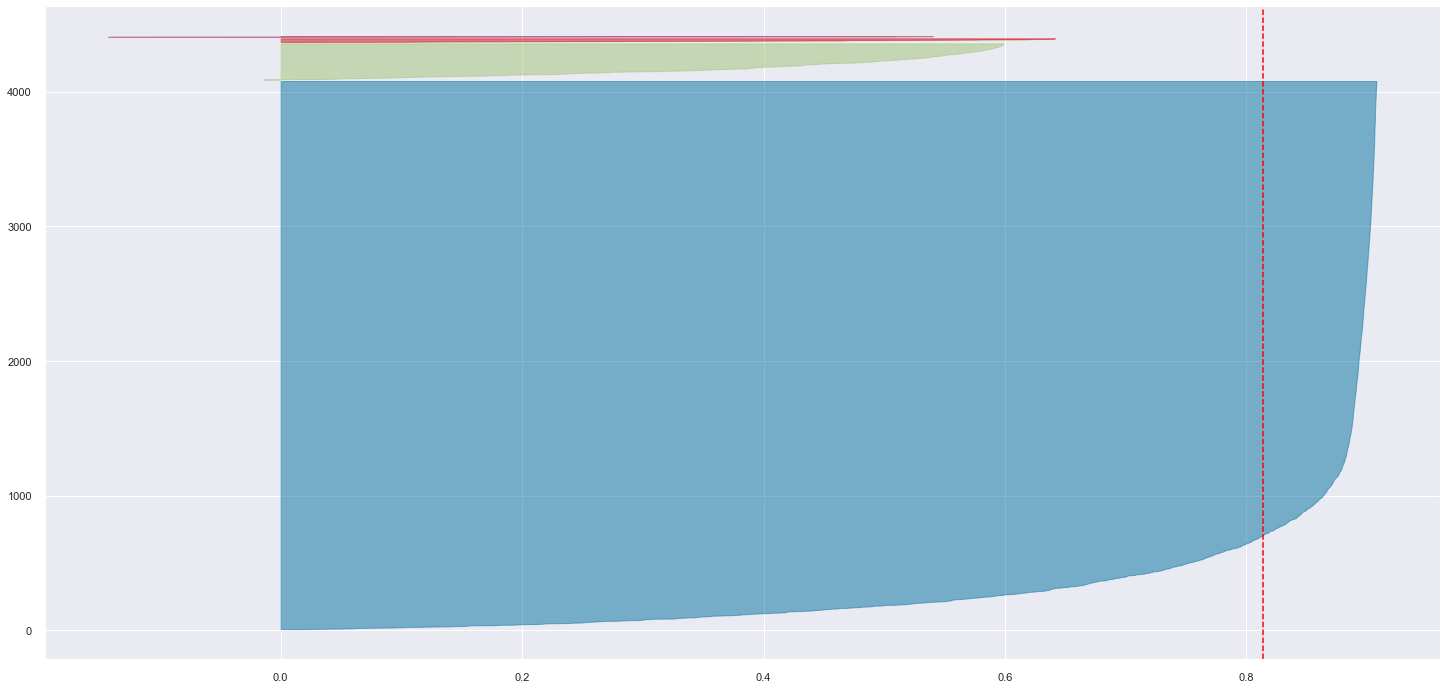

In [214]:
#from plotly import express as px
#fig = px.scatter_3d(df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster')
#fig.show()

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
viausalizer.finalize()

## 9.2. 2d plot

In [ ]:
df_viz = df9.drop( columns = 'customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster')

## 9.4. UMAP -t-SNE


In [ ]:
#!pip install llvmlite==0.37.0rc2 --ignore-installed
#!pip install umap-learn
#import umap.umap_ as umap

# UMAP: cluster designed with high dimensionality

reducer = umap.UMAP(n_neighbors=20, random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x',
                y='embedding_y',
                hue='cluster',
                palette=sns.color_palette('hls',
                                          n_colors=len(
                                              df_viz['cluster'].unique())),
                data=df_viz)

## 9.2. Profil de grappe

In [ ]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id']/df_cluster['customer_id'].sum())

# Avg gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how = 'inner', on ='cluster')

# Avg recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how = 'inner', on ='cluster')

# Avg invoice_no
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how = 'inner', on ='cluster')

# Avg ticket
df_avg_ticket = df9[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_ticket, how = 'inner', on ='cluster')

df_cluster

**Cluster 1: Insider Candidate**
- Number of customers: 6 (0,14% of customers)
- Average Recency: 7 days
- Average Purchase: 89 
- Avarage Revenue: $ 182.182,00 dollars
- Avarage Ticket: $ 253,62

**Cluster 0:**
- Number of customers: 28 (0,64% of customers)
- Average Recency: 6 days
- Average Purchase: 57 
- Avarage Revenue: $ 42.614,38 dollars  
- Avarage Ticket: $ 162,86

    
**Cluster 3:**
- Number of customers: 269 (6,15% of customers)
- Average Recency: 20 days
- Average Purchase: 19 
- Avarage Revenue: $ 944, 95 dollars
- Avarage Ticket: $ 62,47


**Cluster 2:**
- Number of customers: 4069 (93,06% of customers)
- Average Recency: 92 days
- Average Purchase: 4 
- Avarage Revenue: $ 1.372,57 dollars  
- Avarage Ticket: $ 25.36

# 10.0. Deploy to Production